# Tip of the Red Giant Branch Measurments
## Jake Wolfram

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import artpop

plt.style.use(artpop.mpl_style)
rng = np.random.RandomState()

In [3]:
artpop.get_filter_names('UBVRIplus')

['Bessell_U',
 'Bessell_B',
 'Bessell_V',
 'Bessell_R',
 'Bessell_I',
 '2MASS_J',
 '2MASS_H',
 '2MASS_Ks',
 'Kepler_Kp',
 'Kepler_D51',
 'Hipparcos_Hp',
 'Tycho_B',
 'Tycho_V',
 'Gaia_G_DR2Rev',
 'Gaia_BP_DR2Rev',
 'Gaia_RP_DR2Rev',
 'Gaia_G_MAW',
 'Gaia_BP_MAWb',
 'Gaia_BP_MAWf',
 'Gaia_RP_MAW',
 'TESS']

In [17]:
ssp_old = artpop.MISTSSP( log_age = 10.1, feh = -1.5, phot_system = 'UBVRIplus', num_stars = 5e7, imf = 'kroupa', random_state = rng, ab_or_vega = 'vega')
ssp_intermediate = artpop.MISTSSP( log_age = 9.5, feh = -1, phot_system = 'UBVRIplus', num_stars = 5e6, imf = 'kroupa', random_state = rng, ab_or_vega = 'vega')
ssp_young = artpop.MISTSSP( log_age = 8.5, feh = 0, phot_system = 'UBVRIplus',num_stars = 5e6, imf = 'kroupa', random_state = rng, ab_or_vega = 'vega')

RGB_o = ssp_old.select_phase('RGB') #RGB of old
RGB_i = ssp_intermediate.select_phase('RGB') #RGB of intermediate
RGB_y = ssp_young.select_phase('RGB') #RGB of young

# Select for asymptotic giant branch
AGB_o = ssp_old.select_phase('AGB')
AGB_i = ssp_intermediate.select_phase('AGB')
AGB_y = ssp_young.select_phase('AGB')

PAGB = ssp_old.select_phase('postAGB')


# go from -4 — 1 feh, generate TRGB and mean clump

In [18]:
# RGB Bandpasses Infrared-Violet

i_o = ssp_old.star_mags('Bessell_I')[RGB_o]  # infrared bandpass for old
i_y = ssp_young.star_mags('Bessell_I')[RGB_y] # infrared bandpass for young
i_i = ssp_intermediate.star_mags('Bessell_I')[RGB_i] #infrared for intermediate

v_o = ssp_old.star_mags('Bessell_V')[RGB_o]  # violet bandpass for old
v_y = ssp_young.star_mags('Bessell_V')[RGB_y] # violet bandpass for young
v_i = ssp_intermediate.star_mags('Bessell_V')[RGB_i] #violet for intermediate

J_o = ssp_old.star_mags('2MASS_J')[RGB_o]  # J bandpass for old
J_y = ssp_young.star_mags('2MASS_J')[RGB_y] # J bandpass for young
J_i = ssp_intermediate.star_mags('2MASS_J')[RGB_i] # J for intermediate


In [19]:
# AGB Bandpasses J-K

AGB_J_o = ssp_old.star_mags('2MASS_J')[AGB_o]  # J bandpass for old
AGB_J_y = ssp_young.star_mags('2MASS_J')[AGB_y] # J bandpass for young
AGB_J_i = ssp_intermediate.star_mags('2MASS_J')[AGB_i] #J for intermediate

AGB_K_o = ssp_old.star_mags('2MASS_Ks')[AGB_o]  # K bandpass for old
AGB_K_y = ssp_young.star_mags('2MASS_Ks')[AGB_y] # K bandpass for young
AGB_K_i = ssp_intermediate.star_mags('2MASS_Ks')[AGB_i] # K for intermediate

J_o = ssp_old.star_mags('2MASS_J')[RGB_o]  # J bandpass for old
J_y = ssp_young.star_mags('2MASS_J')[RGB_y] # J bandpass for young
J_i = ssp_intermediate.star_mags('2MASS_J')[RGB_i] # J for intermediate




In [20]:
# RGB Bandpasses for J-K
RGB_J_o = ssp_old.star_mags('2MASS_J')[RGB_o]  # J bandpass for old RGB
RGB_J_y = ssp_young.star_mags('2MASS_J')[RGB_y] # infrared bandpass for young
RGB_J_i = ssp_intermediate.star_mags('2MASS_J')[RGB_i] #infrared for intermediate

RGB_K_o = ssp_old.star_mags('2MASS_Ks')[RGB_o]  # K bandpass for old RGB
RGB_K_y = ssp_young.star_mags('2MASS_Ks')[RGB_y] # K bandpass for young
RGB_K_i = ssp_intermediate.star_mags('2MASS_Ks')[RGB_i] #K for intermediate

J_o = ssp_old.star_mags('2MASS_J')[RGB_o]  # J bandpass for old
J_y = ssp_young.star_mags('2MASS_J')[RGB_y] # J bandpass for young
J_i = ssp_intermediate.star_mags('2MASS_J')[RGB_i] # J for intermediate


In [21]:
# Post AGB Bandpasses for B-V
PAGB_B = ssp_old.star_mags('Bessell_B')[PAGB]
PAGB_V = ssp_old.star_mags('Bessell_V')[PAGB]

RGB_B_o = ssp_old.star_mags('Bessell_B')[RGB_o]
RGB_V_o = ssp_old.star_mags('Bessell_V')[RGB_o]

AGB_B_o = ssp_old.star_mags('Bessell_B')[AGB_o]
AGB_V_o = ssp_old.star_mags('Bessell_B')[AGB_o]

Maximum magnitude for young red giant stars -3.682108391189954
Mean young -6.784238896550918


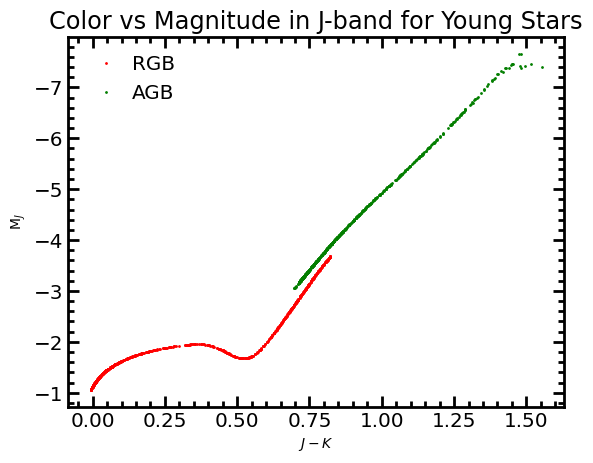

In [22]:
#Plotting only RGB
#Young Stars
#plt.plot(v_y-i_y, J_y, 'o',  mec = 'k', c= 'tab:red', markersize=1)
#plt.gca().invert_yaxis()
#plt.title('Color vs Magnitude in J-band for Young Stars')
#plt.xlabel(r'$V-i$')  # g-i color
#plt.ylabel(r'M$_J$')  #magnitude in i band
#plt.minorticks_on()
#print("Maximum magnitude for young red giant stars" ,np.min(J_y))


#Now plotting AGB too!
JK= RGB_J_y-RGB_K_y
plt.plot(JK, J_y, 'o',  mec = 'r', c= 'tab:red', markersize=1, label = "RGB")
plt.gca().invert_yaxis()
plt.title('Color vs Magnitude in J-band for Young Stars')
plt.xlabel(r'$J-K$')  # J-K color
plt.ylabel(r'M$_J$')  #magnitude in J band
plt.minorticks_on()
print("Maximum magnitude for young red giant stars" ,np.min(J_y))

JK = AGB_J_y-AGB_K_y

plt.plot(JK, AGB_J_y, 'o', mec = 'g', c='red', markersize=1, label = "AGB")
plt.plot
plt.legend()

# MEAN OF JAGB CLUMP YOUNG
sum = 0
n = 0
for i in AGB_J_y:  
    if i <=-6:
        sum +=i
        n =n+1
        
AGB_mean_y = sum/n
print('Mean young', AGB_mean_y )

Maximum magnitude for intermediate red giant stars -5.009118172137061
Mean intermediate -4.937502336102965


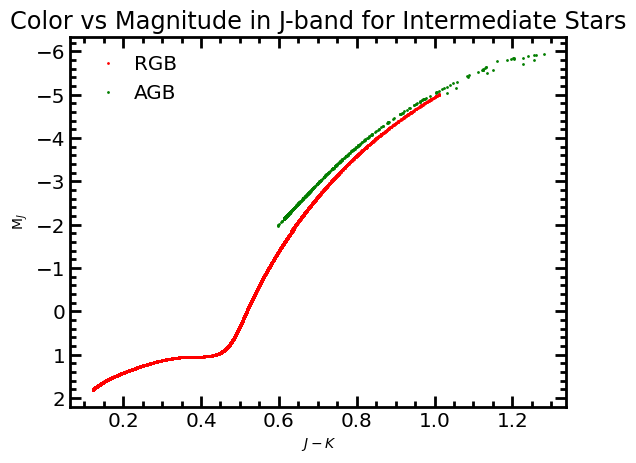

In [23]:
# RGB only
#Intermediate Stars
#plt.plot(v_i-i_i, ssp_intermediate.log_L[RGB_i], 'o',  mec = 'k', c= 'tab:red', markersize=1)
#plt.plot(v_i-i_i, J_i, 'o',  mec = 'k', c= 'tab:red', markersize=1)
#plt.gca().invert_yaxis()
#plt.title('Color vs Magnitude in J-band for Intermediate Stars')
#plt.xlabel(r'$V-i$')  # g-i color
#plt.ylabel(r'M$_J$')  #magnitude in i band
#plt.minorticks_on()


JK= RGB_J_i-RGB_K_i
plt.plot(JK, J_i, 'o',  mec = 'r', c= 'tab:red', markersize=1, label= "RGB")
plt.gca().invert_yaxis()
plt.title('Color vs Magnitude in J-band for Intermediate Stars')
plt.xlabel(r'$J-K$')  # J-K color
plt.ylabel(r'M$_J$')  #magnitude in J band
plt.minorticks_on()

#plt.xlim(-1,1)
print("Maximum magnitude for intermediate red giant stars" ,np.min(J_i))

JK = AGB_J_i-AGB_K_i

plt.plot(JK, AGB_J_i, 'o', mec = 'g', c='red', markersize=1, label = "AGB")
plt.plot
plt.legend()
#print("Maximum magnitude for intermediate red giant stars" ,np.min(J_i))
#print("Maximum luminosity for intermediate red giant stars" ,np.max(ssp_intermediate.log_L[RGB_i]))


# MEAN OF JAGB CLUMP INTERMEDIATE
sum = 0
n = 0
for i in AGB_J_i:  
    if i <=-4:
        sum +=i
        n =n+1
        
AGB_mean_i = sum/n
print('Mean intermediate', AGB_mean_i)

Maximum magnitude for Old red giant stars -4.999190269713073
Mean old -4.270960931288221


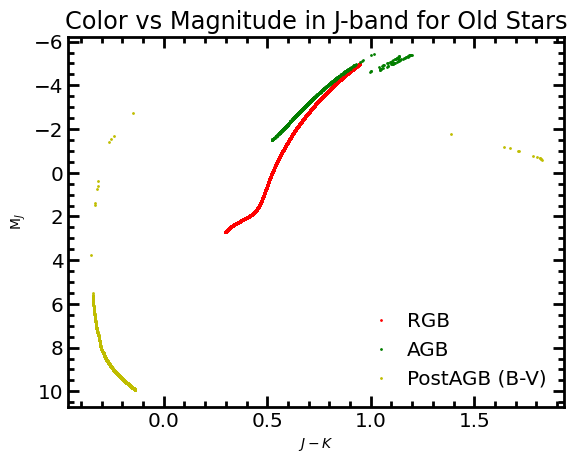

In [32]:
# RGB only
#Old Stars
#plt.plot(v_o-i_o, J_o, 'o',  mec = 'k', c= 'tab:red', markersize=1)
#plt.gca().invert_yaxis()
#plt.title('Color vs Magnitude in J-band for Old Stars')
#plt.xlabel(r'$V-i$')  # g-i color
#plt.ylabel(r'M$_J$')  #magnitude in i band
#plt.minorticks_on()
#print("Maximum magnitude for old red giant stars" ,np.min(J_o))

#AGB and RGB plotted
JK= RGB_J_o-RGB_K_o
plt.plot(JK, J_o, 'o',  mec = 'r', c= 'tab:red', markersize=1, label = "RGB")
plt.gca().invert_yaxis()
plt.title('Color vs Magnitude in J-band for Old Stars')
plt.xlabel(r'$J-K$')  # J-K color
plt.ylabel(r'M$_J$')  #magnitude in J band
plt.minorticks_on()
print("Maximum magnitude for Old red giant stars" ,np.min(J_o))

JK = AGB_J_o-AGB_K_o

plt.plot(JK, AGB_J_o, 'o', mec = 'g', c='red', markersize=1, label = "AGB")
plt.plot
plt.legend()


# Plot Post-AGB

plt.plot(PAGB_B-PAGB_V, PAGB_B, 'o',  mec = 'y', c= 'tab:red', markersize=1, label = "PostAGB (B-V)")



plt.plot
plt.legend()

# MEAN OF JAGB CLUMP OLD
sum = 0
n = 0
for i in AGB_J_o:  
    if i <=-3.5:
        sum +=i
        n =n+1

AGB_mean_o = sum/n
print('Mean old', AGB_mean_o)

In [25]:
avg_JAGB_clump = (AGB_mean_y +AGB_mean_i +AGB_mean_o )/ 3
print(avg_JAGB_clump)

-5.330900721314035


Maximum magnitude for Old red giant stars -2.501530956517662
Mean old -4.270960931288221


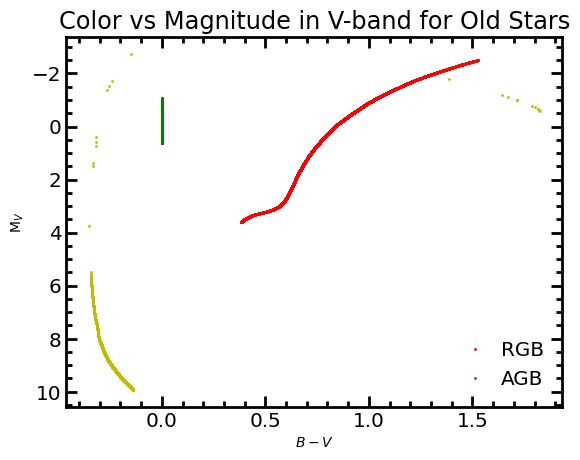

In [28]:
# Post AGB Bandpasses for B-V
PAGB_B = ssp_old.star_mags('Bessell_B')[PAGB]
PAGB_V = ssp_old.star_mags('Bessell_V')[PAGB]

RGB_B_o = ssp_old.star_mags('Bessell_B')[RGB_o]
RGB_V_o = ssp_old.star_mags('Bessell_V')[RGB_o]

AGB_B_o = ssp_old.star_mags('Bessell_B')[AGB_o]
AGB_V_o = ssp_old.star_mags('Bessell_B')[AGB_o]


#AGB and RGB plotted
BV= RGB_B_o-RGB_V_o
plt.plot(BV, RGB_V_o, 'o',  mec = 'r', c= 'tab:red', markersize=1, label = "RGB")
plt.gca().invert_yaxis()
plt.title('Color vs Magnitude in V-band for Old Stars')
plt.xlabel(r'$B-V$')  # B-V color
plt.ylabel(r'M$_V$')  #magnitude in V band
plt.minorticks_on()
print("Maximum magnitude for Old red giant stars" ,np.min(RGB_V_o))

BVagb = AGB_B_o-AGB_V_o

plt.plot(BVagb, AGB_V_o, 'o', mec = 'g', c='red', markersize=1, label = "AGB")
plt.plot
plt.legend()


# Plot Post-AGB

plt.plot(PAGB_B-PAGB_V, PAGB_B, 'o',  mec = 'y', c= 'tab:red', markersize=1, label = "PostAGB")





# MEAN OF JAGB CLUMP OLD
sum = 0
n = 0
for i in AGB_J_o:  
    if i <=-3.5:
        sum +=i
        n =n+1

AGB_mean_o = sum/n
print('Mean old', AGB_mean_o)

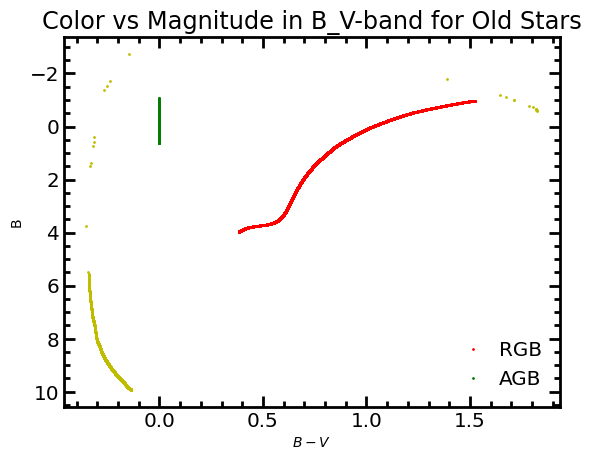

In [27]:
#AGB and RGB plotted

plt.plot(RGB_B_o-RGB_V_o, RGB_B_o, 'o',  mec = 'r', c= 'tab:red', markersize=1, label = "RGB")
plt.gca().invert_yaxis()
plt.title('Color vs Magnitude in B_V-band for Old Stars')
plt.xlabel(r'$B-V$')  # J-K color
plt.ylabel(r'B')  #magnitude in J band
plt.minorticks_on()


plt.plot(AGB_B_o-AGB_V_o, AGB_B_o, 'o', mec = 'g', c='red', markersize=1, label = "AGB")
plt.plot
plt.legend()


# Plot Post-AGB

plt.plot(PAGB_B-PAGB_V, PAGB_B, 'o',  mec = 'y', c= 'tab:red', markersize=1, label = "PostAGB")

